In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Read the dataset
df = pd.read_csv('day.csv')

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.shape

(730, 16)

In [5]:
df.info()    # No column has null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

## Step 1: Exploratory Data Analysis

### 1.1 Dropping unnecessary columns

- **`instant`** coulmn is the unique identifier , it is not required for analysis
- **`dteday`** column has the date of the record. The information for year and month is already present in columns 'yr' and 'mnth'
- **`casual`** column gives no of casual visitors 
- **`registered`** column gives no of registered visitors

   TARGET variable `cnt = casual + registered`, we want to predict cnt i.e sum of casual and registered. 
    So, dropping both casual and registered column.


In [8]:
df.drop(columns=['instant', 'dteday','casual', 'registered'], inplace=True)

In [9]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


### 1.2 Check missing values

In [10]:
df.isnull().sum()                # No col has missing values

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

### 1.3 Check duplicate rows

In [11]:
df.duplicated().sum()          # No duplicate rows

0

### 1.4 Check datatypes

There are some categorical variables that are stored as integers.

**`Converting these int variables to object(string) datatype for the following reasons:`**
1. While passing values to the Linear regression model, we need to use `pd.get_dummies()` method. This method accepts only **object** datatype col as input.
2. Converting numeric values to their categories, will be easier to interpret while visualizations.

In [12]:
# Mapping variables to their categories

# season (1:spring, 2:summer, 3:fall, 4:winter)
df.season = df.season.map({1:'spring',2:'summer',3:'fall',4:'winter'})

# weathersit (1:Clear-Cloudy, 2:Mist-Cloudy, 3:Light-snow-rain, 4:Heavy-rain-ice)
df.weathersit = df.weathersit.map({1:'Clear',2:'Cloudy',3:'Rainy',4:'Thunderstorm'})

# weekday (0- Sun, 1- Mon, ................, 6- Sat)
df.weekday = df.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thur',5:'Fri',6:'Sat'})

# month (1-Jan, 2-Feb................... , 11-Nov, 12-Dec)
df.mnth = df.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [13]:
# Checking the datatype of columns again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


### 1.5 Data Visualization & Data Understanding

#### Continuous numeric variables

**Outliers**

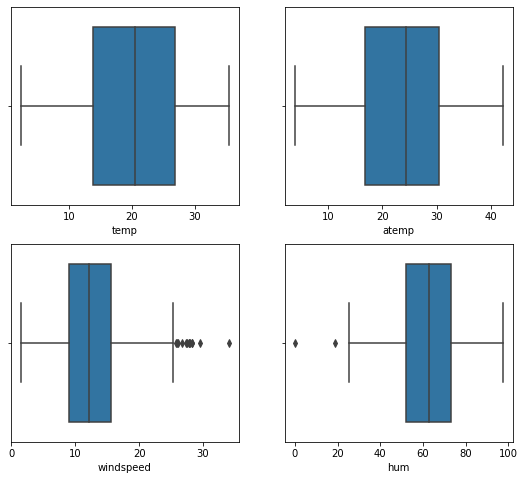

In [14]:
# Check for outliers and overall spread (in continuous variables)

plt.figure(figsize=[9,8])

# temp
plt.subplot(2,2,1)
sns.boxplot(df['temp'])

# atemp
plt.subplot(2,2,2)
sns.boxplot(df['atemp'])

# windspeed
plt.subplot(2,2,3)
sns.boxplot(df['windspeed'])

# hum
plt.subplot(2,2,4)
sns.boxplot(df['hum'])

plt.show()

# Very few outliers for humidity and windspeed. But they are not having very high or very low values
# Keeping them as it is. 

**Pairplot**

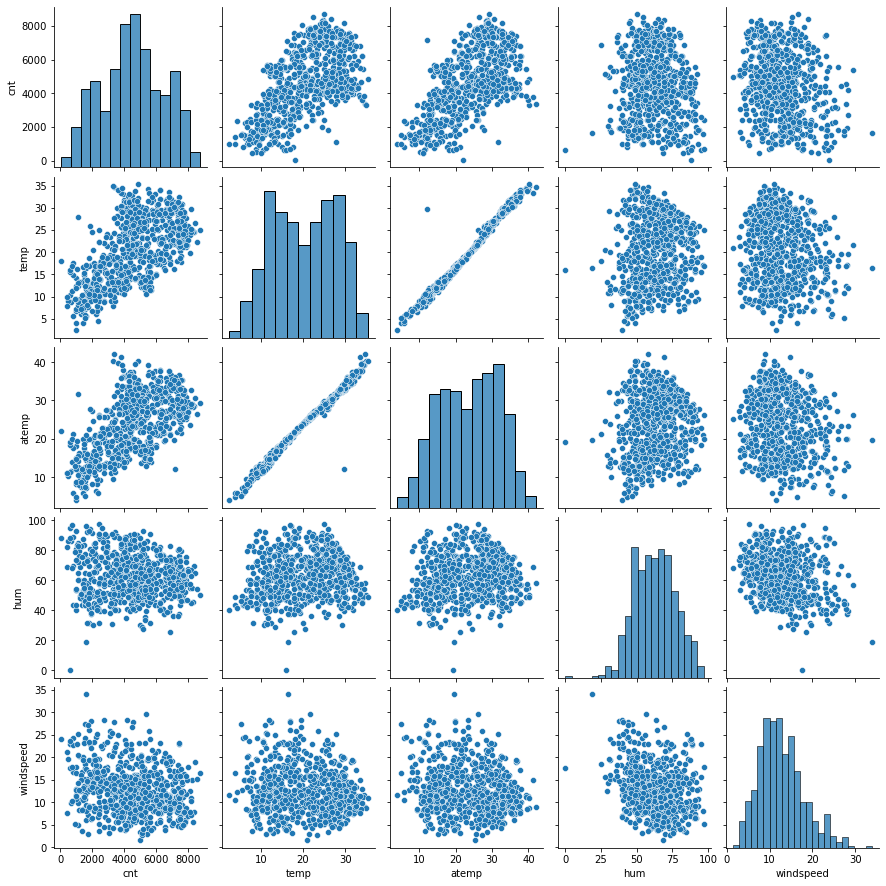

In [15]:
# Pairplots (for numeric variables)
sns.pairplot(df[['cnt','temp','atemp','hum','windspeed']])
plt.show()

- cnt is highly linearly correlated to temp and atemp
- temp and atemp have very strong linear trend indicating a very high correlation

**Correlation heatmap**

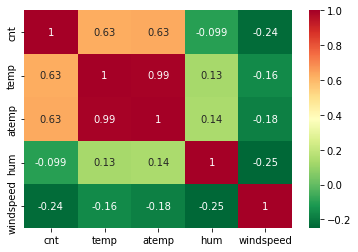

In [16]:
# Correlation heatmap
sns.heatmap( df[['cnt','temp','atemp','hum','windspeed']].corr(), cmap='RdYlGn_r', annot = True)
plt.show()

# 1. temp has the strongest positive correlation with cnt
# 2. windspeed is negatively correlated with cnt indicating when wind is more, the count of total bikes will be less.
# 3. himidity is also negatively correlated with cnt indicating when climate is humid, the count of total bikes will be less.
# 4. temp and atemp have a very high correlation of 0.99. Thus, they are redundant variables. We can drop any of these.

In [17]:
# Dropping one variable out of temp and atemp as they are highly correlated 
# If both highly correlated varisbles are kept, it will impact the model (will raise issue of multicollinearity)

# Drop atemp as it seems to be derived from temp col only.
df.drop('atemp', axis = 1, inplace=True)

#### Binary / Categorical variables

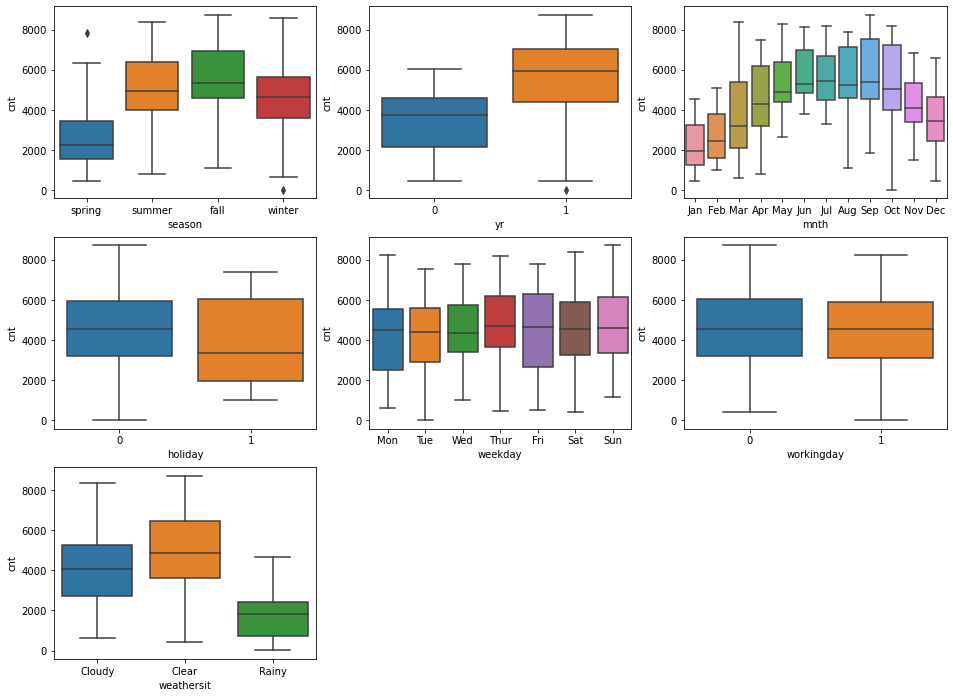

In [18]:
# Box plot for binary / categorical variables
plt.figure(figsize=[16,12])

plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt', data=df)
plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt', data=df)
plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt', data=df)
plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='cnt', data=df)
plt.subplot(3,3,5)
sns.boxplot(x='weekday',y='cnt', data=df)
plt.subplot(3,3,6)
sns.boxplot(x='workingday',y='cnt', data=df)
plt.subplot(3,3,7)
sns.boxplot(x='weathersit',y='cnt', data=df)

plt.show()

**Season**: Highest number of bikes were rented in `fall` and summer season <br>
**Year**: More bikes were rented in `2019` than 2018<br>
**Month**: Wrt to month, rented bikes increases from Jan to Mid of year, reaches max in `Sep` and then again decreases<br>
**Holiday**: Less bikes are rented on holiday<br>
**Weather**: Maximum number of bikes are rented on days when weather is Clear and minimum are rented in rainy weather.<br>
No clear trend of no of bikes with weekday or workingday.<br>


### CAN LINEAR REGRESSION MODEL BE USED ?
`Check if target variable cnt have any linear relationship with any of the predictors?`

As per above data undertstanding, following is observed:

*(correlation heatmap)*
- temp has very high negative correlation with cnt. 
- windspeed has maximum positive correlation with cnt  

*(Categorical variable boxplots)*
- Season, Year, Month, Holiday and Weather also influence cnt

Thus, we can definitely build a Linear Regression model.
<br>

## Step 2: Data Preparation

### 2.1 Creating dummy variables

In [19]:
# Dummy variable for season
season_dummy = pd.get_dummies(df['season'], drop_first=True)

# Dummy variable for month
month_dummy = pd.get_dummies(df['mnth'], drop_first=True)

# Dummy variable for weekday
weekday_dummy = pd.get_dummies(df['weekday'], drop_first=True)

# Dummy variable for weather
weather_dummy = pd.get_dummies(df['weathersit'], drop_first=True, )

In [20]:
dummies = pd.concat([season_dummy, month_dummy, weekday_dummy, weather_dummy], axis = 1)

In [21]:
pd.set_option("display.max_columns", None)

In [22]:
df = pd.concat([df, dummies], axis = 1)
df.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,Cloudy,Rainy
0,spring,0,Jan,0,Mon,1,Cloudy,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,spring,0,Jan,0,Tue,1,Cloudy,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Thur,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
# Dropping the columns for which dummies are created
df.drop(columns = ['season','mnth','weathersit','weekday'], inplace=True)

### 2.2 Train Test Split

In [24]:
# Splitting original dataset into 70-30 ratio
df_train, df_test = train_test_split(df, train_size=0.7, random_state = 100)

In [25]:
df_train.shape

(510, 29)

In [26]:
df_test.shape

(220, 29)

### 2.3 Rescaling variables

In [27]:
# Need to scale numerical columns (excluding binary / dummy variables)
num_cols = ['temp','hum','windspeed','cnt']

In [28]:
# Use Min-Max scaling to bring all variables to same scale.
scaler = MinMaxScaler()

df_train[num_cols] = scaler.fit_transform(df_train[num_cols])

In [29]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,Cloudy,Rainy
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
111,0,0,0,0.345824,0.751824,0.380981,0.191095,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


### 2.4 Dividing into X and Y sets

In [30]:
# Depdendent variable
y_train = df_train.pop('cnt')

# Independent variables
X_train = df_train

## Step 3: Building the model

Since there are large number of predictors, I have used mixed approach.<br>
`Beginning with RFE and later eliminating predictors one by one by checking p-value significance and VIF`

### 3.1 Recurrsive Feature Elimination (RFE)

In [31]:
# Creating model
lm = LinearRegression()
lm.fit(X_train, y_train)

# Using RFE to select top 15 features from the train set
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [32]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 11),
 ('Mar', False, 14),
 ('May', False, 8),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 7),
 ('Sat', False, 4),
 ('Sun', False, 5),
 ('Thur', False, 13),
 ('Tue', False, 6),
 ('Wed', False, 10),
 ('Cloudy', True, 1),
 ('Rainy', True, 1)]

In [33]:
# Columns selected by RFE
rfe_cols = X_train.columns[rfe.support_]
rfe_cols

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep', 'Cloudy', 'Rainy'],
      dtype='object')

In [34]:
# Using only RFE selected columns in training set
X_train_rfe = X_train[rfe_cols]

In [35]:
X_train_rfe.head()

,yr,holiday,temp,hum,windspeed,spring,summer,winter,Dec,Jan,Jul,Nov,Sep,Cloudy,Rainy
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,1,0
728,1,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,1,0
111,0,0,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,1,0


### 3.2 Building model using statsmodels

`X_train_rfe` is the train set with columns selected by RFE. 

**MODEL 1**
(Using all RFE variables)

In [36]:
# Add constant to X_train_model
X_train_sm = sm.add_constant(X_train_rfe)

# Using OLS to create a model
model1 = sm.OLS(y_train,X_train_sm).fit()

In [37]:
# View cofficients
model1.params.sort_values(ascending = False)

temp         0.481503
const        0.319667
yr           0.230404
winter       0.101921
Sep          0.075467
summer       0.042337
Dec         -0.035461
Nov         -0.038701
Jan         -0.043411
Cloudy      -0.054300
Jul         -0.055250
spring      -0.061255
holiday     -0.091089
hum         -0.162213
windspeed   -0.188726
Rainy       -0.246481
dtype: float64

In [38]:
# Summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Sat, 06 Aug 2022   Prob (F-statistic):          8.15e-189
Time:                        22:24:17   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3197      0.036      8.859      0.000       0.249       0.391
yr             0.2304      0.008     28.487      0.000       0.215       0.246
holiday       -0.0911      0.026     -3.557      0.000      -0.141      -0.041
temp           0.4815      0.037     13.005      0.000       0.409       0.554
hum           -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed     -0.1887      0.026     -7.315      0.000      -0.239      -0.138
spring        -0.0613      0.021     -2.881      0.004      -0.103      -0.019
summer         0.0423      0.015      2.761      0.006       0.012       0.072
winter         0.1019      0.018      5.656      0.000       0.067       0.137
Dec           -0.0355      0.018     -2.024      0.043      -0.070      -0.001
Jan           -0.0434      0.018     -2.393      0.017      -0.079      -0.008
Jul           -0.0553      0.018     -3.030      0.003      -0.091      -0.019
Nov           -0.0387      0.019     -2.057      0.040      -0.076      -0.002
Sep            0.0755      0.017      4.466      0.000       0.042       0.109
Cloudy        -0.0543      0.010     -5.194      0.000      -0.075      -0.034
Rainy         -0.2465      0.026     -9.331      0.000      -0.298      -0.195
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

`Cofficients`<br>
- Temperature has the highest cofficient indicating a positive relationship with cnt<br>
- Year, Sept and Summer also have positive cofficients<br>
- Rainy,windspeed,humidity, holiday, sprint, Jul, Cloudy, Jan, Nov, Dec have negative cofficients meaning negative relationship with cnt

`P-value`<br>
All the predictor variables have p-value less than 0.05. <br>
As per the model, *dec and nov are somewhat less significant* as they have p-values of 0.043 and 0.040 (close to 0.05)

`R-squared`<br> 
0.845 means that 84.5% variance in number of bikes rented is explained by all the predictors in the model

`Prob (F-statistic)`<br>
Very less than 0.05, indicating that overall fit is significant, not by chance

In [39]:
# Check for Multicollinearity 

# Checking VIF of all the predictors 
X = X_train_sm.drop('const', axis = 1)

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,30.89
2,temp,17.79
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.82
13,Cloudy,2.32
0,yr,2.09
11,Nov,1.85
9,Jan,1.75


Features hum and temp have a very high VIF (greater than 5), they are highly correlated to other predictors<br>
We can **drop `hum`** to create our next model 

**MODEL 2** (Dropping hum)

In [40]:
# Drop hum column
X_train_model =  X_train_rfe.drop('hum', axis = 1)

In [41]:
# Add constant to X_train_model
X_train_sm = sm.add_constant(X_train_model)

# Using OLS to create a model
model2 = sm.OLS(y_train, X_train_sm).fit()

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Sat, 06 Aug 2022   Prob (F-statistic):          4.75e-186
Time:                        22:24:17   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2450      0.032      7.618      0.000       0.182       0.308
yr             0.2345      0.008     28.687      0.000       0.218       0.251
holiday       -0.0918      0.026     -3.522      0.000      -0.143      -0.041
temp           0.4387      0.036     12.093      0.000       0.367       0.510
windspeed     -0.1585      0.025     -6.276      0.000      -0.208      -0.109
spring        -0.0713      0.021     -3.314      0.001      -0.113      -0.029
summer         0.0349      0.015      2.251      0.025       0.004       0.065
winter         0.0869      0.018      4.831      0.000       0.052       0.122
Dec           -0.0428      0.018     -2.413      0.016      -0.078      -0.008
Jan           -0.0500      0.018     -2.719      0.007      -0.086      -0.014
Jul           -0.0500      0.019     -2.703      0.007      -0.086      -0.014
Nov           -0.0395      0.019     -2.064      0.040      -0.077      -0.002
Sep            0.0687      0.017      4.015      0.000       0.035       0.102
Cloudy        -0.0801      0.009     -9.198      0.000      -0.097      -0.063
Rainy         -0.2917      0.025    -11.840      0.000      -0.340      -0.243
==============================================================================
Omnibus:                       69.242   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.476
Skew:                          -0.698   Prob(JB):                     5.81e-38
Kurtosis:                       5.473   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

`P-value`
All the predictor variables have p-value less than 0.05.<br>
`R-squared`
0.839 means that 83.9% variance in number of bikes rented is explained by all the predictors in the model<br>
`Prob (F-statistic)`
Very less than 0.05, indicating that overall fit is significant, not by chance

In [42]:
# Check for Multicollinearity 

# Checking VIF of all the predictors 
X = X_train_sm.drop('const', axis = 1)

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,winter,2.95
4,spring,2.89
5,summer,2.24
0,yr,2.07
10,Nov,1.81
8,Jan,1.66
9,Jul,1.59
12,Cloudy,1.57


temp have a very high VIF (greater than 5), it is highly correlated to other predictors<br>
Although, **temp is highly correlated to cnt (tagret variable)**. <br>
But lets try `removing temp` and checking the strength of the model

**MODEL 3** (Dropping temp)

`Dropped columns` : hum, temp

In [43]:
# Drop hum, temp column from rfe columns
X_train_model =  X_train_rfe.drop(['hum','temp'], axis = 1)

In [44]:
# Add constant to X_train_model
X_train_sm = sm.add_constant(X_train_model)

# Using OLS to create a model
model3 = sm.OLS(y_train, X_train_sm).fit()

model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     144.9
Date:                Sat, 06 Aug 2022   Prob (F-statistic):          1.82e-159
Time:                        22:24:17   Log-Likelihood:                 438.84
No. Observations:                 510   AIC:                            -849.7
Df Residuals:                     496   BIC:                            -790.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5954      0.016     37.460      0.000       0.564       0.627
yr             0.2457      0.009     26.616      0.000       0.228       0.264
holiday       -0.0855      0.030     -2.887      0.004      -0.144      -0.027
windspeed     -0.1902      0.029     -6.662      0.000      -0.246      -0.134
spring        -0.2503      0.018    -14.125      0.000      -0.285      -0.216
summer        -0.0497      0.016     -3.160      0.002      -0.081      -0.019
winter        -0.0231      0.018     -1.307      0.192      -0.058       0.012
Dec           -0.1086      0.019     -5.660      0.000      -0.146      -0.071
Jan           -0.1202      0.020     -6.056      0.000      -0.159      -0.081
Jul           -0.0182      0.021     -0.875      0.382      -0.059       0.023
Nov           -0.0995      0.021     -4.731      0.000      -0.141      -0.058
Sep            0.0534      0.019      2.750      0.006       0.015       0.092
Cloudy        -0.0869      0.010     -8.800      0.000      -0.106      -0.068
Rainy         -0.3117      0.028    -11.150      0.000      -0.367      -0.257
==============================================================================
Omnibus:                       56.274   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.272
Skew:                          -0.588   Prob(JB):                     1.89e-29
Kurtosis:                       5.200   Cond. No.                         9.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

`P-value`
Jul and winter have value more than 0.05. They are not much significant as per the model<br>
`R-squared`
0.792 means that 79.2% variance in number of bikes rented is explained by all the predictors in the model<br>
`Prob (F-statistic)`
Very less than 0.05, indicating that overall fit is significant, not by chance

In [45]:
# Check for Multicollinearity 

# Checking VIF of all the predictors 
X = X_train_sm.drop('const', axis = 1)

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.89
3,spring,2.89
5,winter,2.85
4,summer,2.02
0,yr,1.83
9,Nov,1.80
7,Jan,1.64
11,Cloudy,1.53
6,Dec,1.46
8,Jul,1.20


All predictors have a VIF < 5

We can try eliminating `Jul` since it has p-value greater than 0.05 and is insignificant as per the model

**MODEL 4** (Dropping Jul)

`Dropped columns` : hum, temp, Jul

In [46]:
# Drop hum, temp, Jul columns from rfe columns
X_train_model =  X_train_rfe.drop(['hum','temp','Jul'], axis = 1)

In [47]:
# Add constant to X_train_model
X_train_sm = sm.add_constant(X_train_model)

# Using OLS to create a model
model4 = sm.OLS(y_train, X_train_sm).fit()

model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     157.0
Date:                Sat, 06 Aug 2022   Prob (F-statistic):          2.08e-160
Time:                        22:24:17   Log-Likelihood:                 438.45
No. Observations:                 510   AIC:                            -850.9
Df Residuals:                     497   BIC:                            -795.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5886      0.014     42.474      0.000       0.561       0.616
yr             0.2458      0.009     26.633      0.000       0.228       0.264
holiday       -0.0852      0.030     -2.877      0.004      -0.143      -0.027
windspeed     -0.1901      0.029     -6.659      0.000      -0.246      -0.134
spring        -0.2439      0.016    -15.125      0.000      -0.276      -0.212
summer        -0.0432      0.014     -3.116      0.002      -0.070      -0.016
winter        -0.0173      0.016     -1.058      0.290      -0.050       0.015
Dec           -0.1081      0.019     -5.635      0.000      -0.146      -0.070
Jan           -0.1201      0.020     -6.057      0.000      -0.159      -0.081
Nov           -0.0987      0.021     -4.699      0.000      -0.140      -0.057
Sep            0.0586      0.018      3.172      0.002       0.022       0.095
Cloudy        -0.0863      0.010     -8.762      0.000      -0.106      -0.067
Rainy         -0.3118      0.028    -11.156      0.000      -0.367      -0.257
==============================================================================
Omnibus:                       56.410   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.512
Skew:                          -0.592   Prob(JB):                     2.77e-29
Kurtosis:                       5.188   Cond. No.                         8.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

`P-value`
winter still has p-value more than 0.05. They are not much significant as per the model<br>
`R-squared`
0.791 means that 79.1% variance in number of bikes rented is explained by all the predictors in the model<br>
`Prob (F-statistic)`
Very less than 0.05, indicating that overall fit is significant, not by chance

In [48]:
# Check for Multicollinearity 

# Checking VIF of all the predictors 
X = X_train_sm.drop('const', axis = 1)

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.52
5,winter,2.75
3,spring,2.71
4,summer,1.87
8,Nov,1.80
0,yr,1.77
7,Jan,1.64
10,Cloudy,1.52
6,Dec,1.46
9,Sep,1.16


All predictors have a VIF < 5

We can try eliminating `winter` since it has high p-value and is insignificant as per the model

**MODEL 5** (Dropping winter)

`Dropped columns` : hum, temp, Jul, winter

In [49]:
# Drop hum, temp, Jul, winter columns from rfe columns
X_train_model =  X_train_rfe.drop(['hum','temp','Jul','winter'], axis = 1)

In [50]:
# Add constant to X_train_model
X_train_sm = sm.add_constant(X_train_model)

# Using OLS to create a model
model5 = sm.OLS(y_train, X_train_sm).fit()

model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     171.2
Date:                Sat, 06 Aug 2022   Prob (F-statistic):          2.71e-161
Time:                        22:24:17   Log-Likelihood:                 437.88
No. Observations:                 510   AIC:                            -851.8
Df Residuals:                     498   BIC:                            -800.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5834      0.013     44.987      0.000       0.558       0.609
yr             0.2459      0.009     26.646      0.000       0.228       0.264
holiday       -0.0854      0.030     -2.883      0.004      -0.144      -0.027
windspeed     -0.1910      0.029     -6.694      0.000      -0.247      -0.135
spring        -0.2367      0.015    -16.212      0.000      -0.265      -0.208
summer        -0.0374      0.013     -2.937      0.003      -0.062      -0.012
Dec           -0.1166      0.017     -6.689      0.000      -0.151      -0.082
Jan           -0.1216      0.020     -6.143      0.000      -0.160      -0.083
Nov           -0.1101      0.018     -6.120      0.000      -0.145      -0.075
Sep            0.0607      0.018      3.304      0.001       0.025       0.097
Cloudy        -0.0872      0.010     -8.883      0.000      -0.106      -0.068
Rainy         -0.3155      0.028    -11.374      0.000      -0.370      -0.261
==============================================================================
Omnibus:                       60.252   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.320
Skew:                          -0.619   Prob(JB):                     2.78e-32
Kurtosis:                       5.303   Cond. No.                         8.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

`P-value`
All the predictors are significant as per the model<br>
`R-squared`
0.791 means that 79.1% variance in number of bikes rented is explained by all the predictors in the model<br>
`Prob (F-statistic)`
Very less than 0.05, indicating that overall fit is significant, not by chance

In [51]:
# Check for Multicollinearity 

# Checking VIF of all the predictors 
X = X_train_sm.drop('const', axis = 1)

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.23
3,spring,2.37
0,yr,1.74
4,summer,1.70
6,Jan,1.62
9,Cloudy,1.48
7,Nov,1.23
8,Sep,1.16
5,Dec,1.13
10,Rainy,1.07


All predictors have a VIF < 5 <br>

As per EDA, *temp has max correlation cofficient with cnt (Target) variable*<br>

We can try **`adding temp variable back`** to the model to check how the model behaves

**MODEL 6** (Adding temp)

`Dropped columns` : hum, Jul, winter

In [52]:
# Drop hum, Jul, winter columns from rfe columns
X_train_model =  X_train_rfe.drop(['hum','Jul','winter'], axis = 1)

In [53]:
# Add constant to X_train_model
X_train_sm = sm.add_constant(X_train_model)

# Using OLS to create a model
model6 = sm.OLS(y_train, X_train_sm).fit()

model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     197.1
Date:                Sat, 06 Aug 2022   Prob (F-statistic):          3.71e-180
Time:                        22:24:17   Log-Likelihood:                 485.33
No. Observations:                 510   AIC:                            -944.7
Df Residuals:                     497   BIC:                            -889.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3525      0.026     13.675      0.000       0.302       0.403
yr             0.2374      0.008     28.062      0.000       0.221       0.254
holiday       -0.0885      0.027     -3.275      0.001      -0.142      -0.035
temp           0.3103      0.031     10.083      0.000       0.250       0.371
windspeed     -0.1638      0.026     -6.260      0.000      -0.215      -0.112
spring        -0.1376      0.017     -8.312      0.000      -0.170      -0.105
summer         0.0019      0.012      0.157      0.876      -0.022       0.026
Dec           -0.0278      0.018     -1.528      0.127      -0.063       0.008
Jan           -0.0649      0.019     -3.433      0.001      -0.102      -0.028
Nov           -0.0107      0.019     -0.559      0.576      -0.048       0.027
Sep            0.0677      0.017      4.041      0.000       0.035       0.101
Cloudy        -0.0773      0.009     -8.578      0.000      -0.095      -0.060
Rainy         -0.2835      0.025    -11.121      0.000      -0.334      -0.233
==============================================================================
Omnibus:                       55.331   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.743
Skew:                          -0.600   Prob(JB):                     3.66e-27
Kurtosis:                       5.071   Cond. No.                         15.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

`P-value`
On addition of temperature back to the model, summer, nov and dec have become insignificant<br>
`R-squared`
Slightly Increased from 79.1 to 82.6%<br>
`Adjusted R-squared`
Increased from 0.786 to 0.822%<br>
`Prob (F-statistic)`
Very less than 0.05, indicating that overall fit is significant, not by chance

In [54]:
# Check for Multicollinearity 

# Checking VIF of all the predictors 
X = X_train_sm.drop('const', axis = 1)

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.44
2,temp,3.86
4,spring,2.44
0,yr,2.05
5,summer,1.74
7,Jan,1.63
10,Cloudy,1.52
9,Sep,1.25
8,Nov,1.24
6,Dec,1.13


All predictors have a VIF < 5 <br>
Since summer is highly insignificant with p-value of 0.876, `dropping summer` to create next model

**MODEL 7** (Dropping summer)

`Dropped columns` : hum, Jul, winter, summer

In [55]:
# Drop hum, temp, Jul, winter, summer columns
X_train_model =  X_train_rfe.drop(['hum','Jul','winter','summer'], axis = 1)

In [56]:
# Add constant to X_train_model
X_train_sm = sm.add_constant(X_train_model)

# Using OLS to create a model
model7 = sm.OLS(y_train, X_train_sm).fit()

model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     215.4
Date:                Sat, 06 Aug 2022   Prob (F-statistic):          2.50e-181
Time:                        22:24:18   Log-Likelihood:                 485.32
No. Observations:                 510   AIC:                            -946.6
Df Residuals:                     498   BIC:                            -895.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3542      0.023     15.163      0.000       0.308       0.400
yr             0.2374      0.008     28.097      0.000       0.221       0.254
holiday       -0.0884      0.027     -3.276      0.001      -0.141      -0.035
temp           0.3088      0.029     10.594      0.000       0.252       0.366
windspeed     -0.1633      0.026     -6.299      0.000      -0.214      -0.112
spring        -0.1388      0.015     -9.563      0.000      -0.167      -0.110
Dec           -0.0287      0.017     -1.687      0.092      -0.062       0.005
Jan           -0.0652      0.019     -3.476      0.001      -0.102      -0.028
Nov           -0.0120      0.017     -0.693      0.489      -0.046       0.022
Sep            0.0670      0.016      4.186      0.000       0.036       0.098
Cloudy        -0.0772      0.009     -8.586      0.000      -0.095      -0.060
Rainy         -0.2839      0.025    -11.208      0.000      -0.334      -0.234
==============================================================================
Omnibus:                       55.735   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.179
Skew:                          -0.603   Prob(JB):                     1.79e-27
Kurtosis:                       5.084   Cond. No.                         13.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

`P-value` Nov and Dec are still insignificant<br>
`R-squared` 82.6%<br>
`Prob (F-statistic)` Very less than 0.05, indicating that overall fit is significant, not by chance

In [57]:
# Check for Multicollinearity 

# Checking VIF of all the predictors 
X = X_train_sm.drop('const', axis = 1)

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,3.94
2,temp,3.79
4,spring,2.20
0,yr,2.05
6,Jan,1.63
9,Cloudy,1.50
8,Sep,1.17
7,Nov,1.16
5,Dec,1.10
1,holiday,1.06


Since Nov is highly insignificant, dropping Nov to create next model

**MODEL 8** (Dropping Nov)

`Dropped columns` : hum, Jul, winter, summer, Nov

In [58]:
# Drop hum, Jul, winter, summer, Nov from rfe columns
X_train_model =  X_train_rfe.drop(['hum','Jul','winter','summer','Nov'], axis = 1)

In [59]:
# Add constant to X_train_model
X_train_sm = sm.add_constant(X_train_model)

# Using OLS to create a model
model8 = sm.OLS(y_train, X_train_sm).fit()

model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     237.2
Date:                Sat, 06 Aug 2022   Prob (F-statistic):          2.01e-182
Time:                        22:24:18   Log-Likelihood:                 485.08
No. Observations:                 510   AIC:                            -948.2
Df Residuals:                     499   BIC:                            -901.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3467      0.021     16.768      0.000       0.306       0.387
yr             0.2373      0.008     28.103      0.000       0.221       0.254
holiday       -0.0910      0.027     -3.404      0.001      -0.143      -0.038
temp           0.3177      0.026     12.160      0.000       0.266       0.369
windspeed     -0.1623      0.026     -6.275      0.000      -0.213      -0.112
spring        -0.1352      0.014     -9.980      0.000      -0.162      -0.109
Dec           -0.0256      0.016     -1.560      0.119      -0.058       0.007
Jan           -0.0635      0.019     -3.416      0.001      -0.100      -0.027
Sep            0.0681      0.016      4.278      0.000       0.037       0.099
Cloudy        -0.0769      0.009     -8.565      0.000      -0.095      -0.059
Rainy         -0.2836      0.025    -11.202      0.000      -0.333      -0.234
==============================================================================
Omnibus:                       55.099   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.867
Skew:                          -0.596   Prob(JB):                     3.44e-27
Kurtosis:                       5.077   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

`P-value` Dec is still insignificant<br>
`R-squared` 82.6%<br>
`Prob (F-statistic)` Very less than 0.05, indicating that overall fit is significant, not by chance

In [60]:
# Check for Multicollinearity 

# Checking VIF of all the predictors 
X = X_train_sm.drop('const', axis = 1)

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.76
3,windspeed,3.76
4,spring,2.14
0,yr,2.03
6,Jan,1.63
8,Cloudy,1.49
7,Sep,1.16
5,Dec,1.09
9,Rainy,1.06
1,holiday,1.03


In [61]:
# Since Dec is insignificant, dropping summer to create next model

**MODEL 9** (Dropping Dec)

`Dropped columns` : hum, Jul, winter, summer, Nov, Dec

In [62]:
# Drop hum, Jul, winter, summer, Nov, Dec from rfe columns
X_train_model =  X_train_rfe.drop(['hum','Jul','winter','summer','Nov','Dec'], axis = 1)

In [63]:
# Add constant to X_train_model
X_train_sm = sm.add_constant(X_train_model)

# Using OLS to create a model
model9 = sm.OLS(y_train, X_train_sm).fit()

model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     262.5
Date:                Sat, 06 Aug 2022   Prob (F-statistic):          4.04e-183
Time:                        22:24:18   Log-Likelihood:                 483.83
No. Observations:                 510   AIC:                            -947.7
Df Residuals:                     500   BIC:                            -905.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3339      0.019     17.556      0.000       0.297       0.371
yr             0.2373      0.008     28.061      0.000       0.221       0.254
holiday       -0.0902      0.027     -3.370      0.001      -0.143      -0.038
temp           0.3320      0.025     13.550      0.000       0.284       0.380
windspeed     -0.1567      0.026     -6.109      0.000      -0.207      -0.106
spring        -0.1340      0.014     -9.892      0.000      -0.161      -0.107
Jan           -0.0570      0.018     -3.142      0.002      -0.093      -0.021
Sep            0.0693      0.016      4.352      0.000       0.038       0.101
Cloudy        -0.0767      0.009     -8.533      0.000      -0.094      -0.059
Rainy         -0.2822      0.025    -11.137      0.000      -0.332      -0.232
==============================================================================
Omnibus:                       53.479   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              117.842
Skew:                          -0.581   Prob(JB):                     2.58e-26
Kurtosis:                       5.048   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

`P-value` All the predictors are significant<br>
`R-squared` 82.5% variance in cnt is explained by the model<br>
`Adjusted R-squared` 82.2% (Adjusted R-squared and R-sqaured values are close indicating *no redundant variable in the model*<br> 
`Prob (F-statistic)` Very less than 0.05, indicating that overall fit is significant, not by chance

In [64]:
# Check for Multicollinearity 

# Checking VIF of all the predictors 
X = X_train_sm.drop('const', axis = 1)

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.76
3,windspeed,3.74
4,spring,2.11
0,yr,2.03
5,Jan,1.60
7,Cloudy,1.48
6,Sep,1.16
8,Rainy,1.06
1,holiday,1.03


This is the **final model** where 
- All of the predictor cofficients have p-value less than 0.05 indicating they are `significant`
- VIF values are also less than 5.

### Cofficients of predictors and their signs 

In [65]:
# Creating a dataframe to store the cofficients of Predictors and their signs 

predictor_df = pd.DataFrame(model9.params.sort_values(ascending = False), columns=['Cofficient'])
predictor_df['Sign'] = predictor_df.Cofficient.apply(lambda x: '-' if str(x)[0] == '-' else '+')
predictor_df.Cofficient = np.abs(predictor_df.Cofficient)
predictor_df.sort_values(by='Cofficient', ascending = False, inplace=True)
predictor_df.drop('const', inplace=True)
predictor_df

,Cofficient,Sign
temp,0.332015,+
Rainy,0.282162,-
yr,0.237313,+
windspeed,0.156730,-
spring,0.133961,-
holiday,0.090153,-
Cloudy,0.076706,-
Sep,0.069269,+
Jan,0.056987,-


- `temp` has the max **positive cofficient** indicating it has `highly positive impact on cnt`
- `Rainy` has the max **negative cofficient** indicating that `if it rains, the cnt will decrease` 

### The significant columns as per the model 

In [66]:
X.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'spring', 'Jan', 'Sep', 'Cloudy',
       'Rainy'],
      dtype='object')

## Step 4: Residual Analysis

In [67]:
# Predicting y_train_pred values  
y_train_pred = model9.predict(X_train_sm)
y_train_pred

576    0.800411
426    0.467442
728    0.414735
482    0.596369
111    0.312336
         ...   
578    0.828768
53     0.249789
350    0.271962
79     0.327792
520    0.637465
Length: 510, dtype: float64

In [68]:
# Residuals
residuals = y_train - y_train_pred

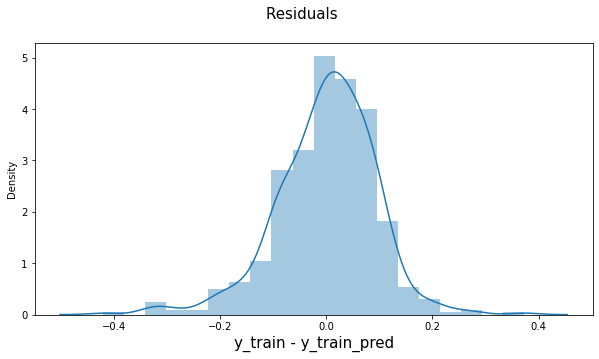

In [69]:
# Check for normal distribution in error terms
fig = plt.figure(figsize=[10,5])
sns.distplot(residuals, bins = 20)
fig.suptitle('Residuals ', fontsize=15)
plt.xlabel('y_train - y_train_pred',fontsize=15)
plt.show()

# The error term distribution is a normal distribution that is centered around 0.

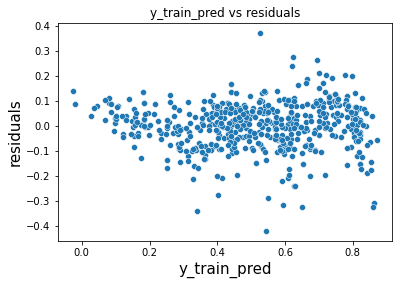

In [70]:
# Check for any pattern between residuals and y_train_pred
sns.scatterplot(y_train_pred, residuals)
plt.xlabel('y_train_pred',fontsize=15)
plt.ylabel('residuals',fontsize=15)
plt.title('y_train_pred vs residuals')
plt.show()

# Since the points are completely random, the error terms have constant variance (homoscedasticity)

## Step 5: Predictions on test set

In [71]:
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,Cloudy,Rainy
184,0,1,0,29.793347,63.7917,5.459106,6043,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
535,1,0,1,32.082500,59.2083,7.625404,6211,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
299,0,0,0,19.270000,81.2917,13.250121,2659,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
221,0,0,1,31.433347,42.4167,13.417286,4780,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,0,0,0,29.315000,30.5000,19.583229,4968,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [72]:
# Need to scale numerical columns (excluding binary / dummy variables)

df_test[num_cols] = scaler.transform(df_test[num_cols])

In [73]:
# Creating y_test and x_test
y_test = df_test.pop('cnt')
X_test = df_test

In [74]:
# Keeping the same columns as the training data, on which model was trained
X_test_new = X_test [X.columns]

# Add constant to X_test
X_test_sm = sm.add_constant(X_test_new)

In [75]:
# Predicting y_test_pred values  
y_test_pred = model9.predict(X_test_sm)

## Step 6: Model Evaluation

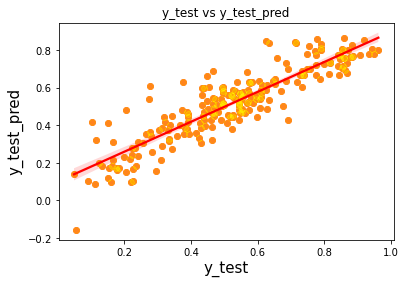

In [76]:
# Check pattern between y_test and y_test_pred

sns.regplot(y_test, y_test_pred,color='r')
plt.scatter(y_test, y_test_pred, alpha= 0.4, color='yellow')
plt.xlabel('y_test',fontsize=15)
plt.ylabel('y_test_pred',fontsize=15)
plt.title('y_test vs y_test_pred')
plt.show() 

# There is a linear trend between y_test and y_test_pred (as predicted by the model)

## R-squared value on Train set

In [77]:
# Train set r2_score
r_squared_train = r2_score(y_train, y_train_pred)
print( "Train R2 score: {}".format(r_squared_train) )

Train R2 score: 0.8253274082990067


## R-squared value on Test set

In [78]:
# Test set r2_score
r_squared_test = r2_score(y_test, y_test_pred)
print( "Test R2 score: {}".format(r_squared_test) )

Test R2 score: 0.7953094573825343


### Significant Predictors

In [79]:
# Predictors sorted in descending order of cofficients and their signs indicating negative or positive correlation 

print(predictor_df)

           Cofficient Sign
temp         0.332015    +
Rainy        0.282162    -
yr           0.237313    +
windspeed    0.156730    -
spring       0.133961    -
holiday      0.090153    -
Cloudy       0.076706    -
Sep          0.069269    +
Jan          0.056987    -


In [80]:
print(X_train_sm.columns)

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'spring', 'Jan', 'Sep',
       'Cloudy', 'Rainy'],
      dtype='object')


### Relation of cnt with other predictors is expressed as:

*cnt = 0.333934 + (0.332015 * temp) + (0.237313 * yr) + (0.069269 * Sept) - (0.056987 * Jan) - (0.076706 * Cloudy) 
      - (0.090153 * holiday) - (0.133961 * spring) - (0.156730 * windspeed) - (0.282162 * Rainy)*

## Conclusions

1. `Temp` positively impacts the number of bikes rented. If temp increases, the cnt also increases by 0.332015 provided all other predictors are constant
2. `Rainy` and `windspeed` negatively impact cnt. When it is a rainy day or windspeed is very high, the number of bikes rented will decrease
3. `yr` 2019 also contributed positively to cnt
4. `spring`, `holiday`, `Cloudy` negatively impact cnt
5. `Sept` has positive relation with cnt, more number of bikes are rented in month of Sept
6. `Jan` has negative relation with cnt, less number of bikes are rented in month of Jan